*   Multimídia - Compressão II (Exercício 2)

*   Felipe Daniel Dias dos Santos - 11711ECP004

*   Graduação em Engenharia de Computação - Faculdade de Engenharia Elétrica - Universidade Federal de Uberlândia

In [ ]:
#Função que realiza a transformada discreta de cosseno de um bloco de imagem "im"
def dct(im):

  #Obtenção das dimensões do bloco de imagem
  n_rows, n_columns = im.shape

  #Matriz que armazenará o resultado da transformação
  T = np.empty([n_rows, n_columns])

  #Cálculo da transformada discreta de cosseno com arredondamento para o inteiro mais próximo
  for i in range(n_rows):

    for j in range(n_columns):
      
      #Reinicialização do somatório
      sum = 0.0

      for k in range(n_rows):

        for l in range(n_columns):
          
          #Cálculo do primeiro fator (cosseno 1)
          num = (2 * k + 1) * i * np.pi
          den = 2 * n_rows
          p1 = np.cos(num / den)

          #Cálculo do segundo fator (cosseno 2)
          num = (2 * l + 1) * j * np.pi
          den = 2 * n_columns
          p2 = np.cos(num / den)

          #Cálculo do terceiro fator (pixel da imagem)
          p3 = im[k, l]

          #Cálculo do somatório
          sum = sum + p1 * p2 * p3
      
      c1 = 1.0
      c2 = 1.0

      #Cálculo da primeira constante
      if i == 0:

        c1 = np.sqrt(2) / 2

      #Cálculo da segunda constante
      if j == 0:

        c2 = np.sqrt(2) / 2

      #Cálculo da constante total
      c = 2 * c1 * c2 / np.sqrt(n_rows * n_columns)

      #Cálculo do elemento da posição (i,j) da matriz final
      T[i, j] = c * sum
  
  return np.round(T)

In [ ]:
#Função que realiza a transformada discreta de cosseno inversa de uma matriz "M"
def idct(M):

  #Obtenção das dimensões da matriz
  n_rows, n_columns = M.shape

  #Matriz que armazenará o resultado da transformação
  IT = np.empty([n_rows, n_columns])

  #Cálculo da transformada discreta de cosseno inversa com arredondamento para o inteiro mais próximo
  for i in range(n_rows):

    for j in range(n_columns):

      #Reinicialização do somatório
      sum = 0.0

      for k in range(n_rows):

        for l in range(n_columns):

          #Cálculo do primeiro fator (cosseno 1)
          num = (2 * i + 1) * k * np.pi
          den = 2 * n_rows
          p1 = np.cos(num / den)

          #Cálculo do segundo fator (cosseno 2)
          num = (2 * j + 1) * l * np.pi
          den = 2 * n_columns
          p2 = np.cos(num / den)

          #Cálculo do terceiro fator (elemento da matriz)
          p3 = M[k, l]

          c1 = 1.0
          c2 = 1.0

          #Cálculo da primeira constante
          if k == 0:

            c1 = np.sqrt(2) / 2

          #Cálculo da segunda constante
          if l == 0:

            c2 = np.sqrt(2) / 2

          #Cálculo da constante total         
          c = 2 * c1 * c2 / np.sqrt(n_rows * n_columns)

          #Cálculo do somatório
          sum = sum + p1 * p2 * p3 * c

      #Cálculo do elemento da posição (i,j) da matriz final
      IT[i, j] = sum

  return np.round(IT)

In [ ]:
#Função que calcula o MSE (Mean Square Error) entre duas imagens
def mse(im1, im2):

  #Dimensões das imagens
  n_rows, n_columns = im1.shape

  #Variável para armazenamento do resultado final
  MSE = 0.0

  #Laço para percorrer as imagens
  for i in range(n_rows):

    for j in range(n_columns):

      #Cálculo do MSE
      MSE = MSE + (im2[i, j] - im1[i, j]) ** 2

  return MSE / (n_rows * n_columns)

Definidas as funções acima para transformada discreta de cosseno e sua inversa, serão definidas (construídas) algumas imagens, onde:

Cada imagem passara pelo processo de transformação e será exibida a matriz resultante;

Cada matriz resultante passará pelo processo de transformação inversa e será exibida a imagem resultante;

Cada par de imagens (antes e após o processo) passará pelo cálculo de MSE (Mean Square Error) para determinar a degradação das imagens ao longo do processo.

In [ ]:
#Declaração das bibliotecas necessárias
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Imagem original:


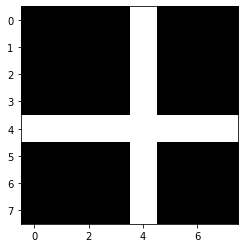


Matriz transformada:
[[ 478.  -62. -292.  175.  223. -262. -121.  309.]
 [ -62.   -2.  -11.    7.    9.  -10.   -5.   12.]
 [-292.  -11.  -54.   33.   42.  -49.  -23.   58.]
 [ 175.    7.   33.  -20.  -25.   29.   14.  -35.]
 [ 223.    9.   42.  -25.  -32.   37.   17.  -44.]
 [-262.  -10.  -49.   29.   37.  -44.  -20.   52.]
 [-121.   -5.  -23.   14.   17.  -20.   -9.   24.]
 [ 309.   12.   58.  -35.  -44.   52.   24.  -61.]]


In [ ]:
#Imagem I: 8x8 binária

#Construção de uma matriz binária, de tamanho 8x8
im = np.zeros([8, 8])

#Formação do padrão da imagem
for i in range(8):

  for j in range(8):

    if j == 4 or i == 4:

      im[i, j] = 255
    
#Mostrar a imagem construída
print("Imagem original:")
plt.imshow(im, 'gray', origin = 'upper')
plt.show()

#Cálculo da transformada discreta de cosseno
T = dct(im)
print("\nMatriz transformada:")
print(T)

Matriz resultante
[[  0.   0.  -0.  -0. 254.  -1.  -0.  -0.]
 [  0.   0.  -1.   0. 255.  -0.   0.  -0.]
 [ -0.  -1.  -0.   0. 255.   0.   0.  -0.]
 [ -0.   0.   0.   0. 255.   0.   0.  -0.]
 [254. 255. 255. 255. 255. 255. 255. 255.]
 [ -1.  -0.   0.   0. 255.   1.  -0.  -0.]
 [ -0.   0.   0.   0. 255.  -0.   0.   0.]
 [ -0.  -0.  -0.  -0. 255.  -0.   0.  -0.]]

Imagem resultante:


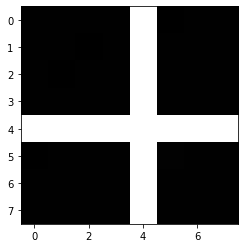

In [ ]:
#Imagem I: 8x8 binária

#Cálculo da transformada discreta de cosseno inversa
IT = idct(T)
print("Matriz resultante")
print(IT)

#Mostrar a imagem resultante do processo da transformada inversa 
print("\nImagem resultante:")
plt.imshow(IT, 'gray', origin = 'upper')
plt.show()

In [ ]:
#Imagem I: 8x8 binária

#Cálculo do MSE das imagens original e resultante
print("Mean Square Error:", mse(im, IT))

Mean Square Error: 0.109375


Imagem original:


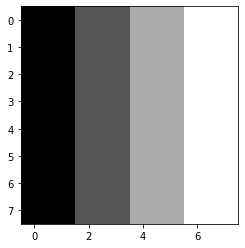


Matriz transformada:
[[1020. -744.   -0.  -45.    0.   30.   -0.  148.]
 [   0.   -0.    0.   -0.    0.    0.   -0.   -0.]
 [  -0.    0.    0.    0.    0.   -0.   -0.   -0.]
 [   0.   -0.   -0.   -0.   -0.    0.    0.    0.]
 [   0.   -0.    0.    0.    0.   -0.    0.    0.]
 [   0.   -0.   -0.   -0.   -0.   -0.   -0.    0.]
 [  -0.    0.    0.   -0.    0.   -0.   -0.   -0.]
 [  -0.    0.   -0.    0.    0.   -0.   -0.   -0.]]


In [ ]:
#Imagem II: 8x8 com 4 níveis de cinza

#Construção de uma matriz cinza, de tamanho 8x8
im = np.array([0, 0, 85, 85, 170, 170, 255, 255])
im = np.array([im] * 8)

#Mostrar a imagem construída
print("Imagem original:")
plt.imshow(im, 'gray', origin = 'upper')
plt.show()

#Cálculo da transformada discreta de cosseno
T = dct(im)
print("\nMatriz transformada:")
print(T)

Matriz resultante
[[ -0.  -0.  85.  85. 170. 170. 255. 255.]
 [ -0.  -0.  85.  85. 170. 170. 255. 255.]
 [ -0.  -0.  85.  85. 170. 170. 255. 255.]
 [ -0.  -0.  85.  85. 170. 170. 255. 255.]
 [ -0.  -0.  85.  85. 170. 170. 255. 255.]
 [ -0.  -0.  85.  85. 170. 170. 255. 255.]
 [ -0.  -0.  85.  85. 170. 170. 255. 255.]
 [ -0.  -0.  85.  85. 170. 170. 255. 255.]]

Imagem resultante:


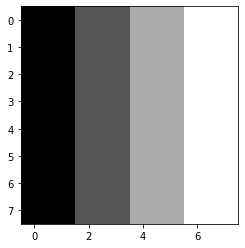

In [ ]:
#Imagem II: 8x8 com 4 níveis de cinza

#Cálculo da transformada discreta de cosseno inversa
IT = idct(T)
print("Matriz resultante")
print(IT)

#Mostrar a imagem resultante do processo da transformada inversa 
print("\nImagem resultante:")
plt.imshow(IT, 'gray', origin = 'upper')
plt.show()

In [ ]:
#Imagem II: 8x8 com 4 níveis de cinza

#Cálculo do MSE das imagens original e resultante
print("Mean Square Error:", mse(im, IT))

Mean Square Error: 0.0


Imagem original:


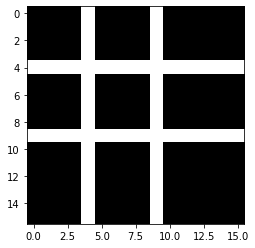


Matriz transformada:
[[ 956.  109. -324.  -34. -171. -406.  237.  592.    0. -180.   47. -333.
  -412.  349.  485.  -58.]
 [ 109.   -4.   11.    1.    6.   14.   -8.  -21.   -0.    6.   -2.   12.
    14.  -12.  -17.    2.]
 [-324.   11.  -34.   -4.  -18.  -42.   25.   61.    0.  -19.    5.  -35.
   -43.   36.   50.   -6.]
 [ -34.    1.   -4.   -0.   -2.   -4.    3.    7.    0.   -2.    1.   -4.
    -5.    4.    5.   -1.]
 [-171.    6.  -18.   -2.   -9.  -22.   13.   32.    0.  -10.    3.  -18.
   -23.   19.   27.   -3.]
 [-406.   14.  -42.   -4.  -22.  -53.   31.   77.    0.  -23.    6.  -43.
   -54.   45.   63.   -8.]
 [ 237.   -8.   25.    3.   13.   31.  -18.  -45.   -0.   14.   -4.   25.
    31.  -26.  -37.    4.]
 [ 592.  -21.   61.    7.   32.   77.  -45. -112.   -0.   34.   -9.   63.
    78.  -66.  -92.   11.]
 [   0.   -0.    0.    0.    0.    0.   -0.   -0.    0.    0.   -0.    0.
     0.   -0.   -0.    0.]
 [-180.    6.  -19.   -2.  -10.  -23.   14.   34.    0.  -10.    3.  

In [ ]:
#Imagem III: 16x16 binária

#Construção de uma matriz binária, de tamanho 16x16
im = np.zeros([16, 16])

#Formação do padrão da imagem
for i in range(16):

  for j in range(16):

    if j == 4 or i == 4 or i == 9 or j == 9:

      im[i, j] = 255
    
#Mostrar a imagem construída
print("Imagem original:")
plt.imshow(im, 'gray', origin = 'upper')
plt.show()

#Cálculo da transformada discreta de cosseno
T = dct(im)
print("\nMatriz transformada:")
print(T)

Matriz resultante
[[ -0.   0.  -1.  -0. 255.  -0.   0.   0.  -0. 256.   0.   1.   0.  -1.
   -0.  -0.]
 [  0.   0.  -0.  -0. 255.   0.   0.  -0.  -0. 255.   0.   0.   0.  -0.
   -0.   0.]
 [ -1.  -0.   0.   0. 255.   1.   0.   0.   0. 255.  -0.   0.  -0.  -0.
   -0.   1.]
 [ -0.  -0.   0.  -0. 255.  -0.  -0.  -0.   0. 254.   0.   0.   0.  -0.
    0.  -0.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255.]
 [ -0.   0.   1.  -0. 255.   0.  -1.   0.  -0. 255.   0.   0.  -0.  -0.
   -0.  -0.]
 [  0.   0.   0.  -0. 255.  -1.   0.  -0.   0. 255.  -0.   0.  -1.  -0.
    0.  -0.]
 [  0.  -0.   0.  -0. 255.   0.  -0.  -0.  -0. 255.   0.   0.  -0.  -0.
   -0.   0.]
 [ -0.  -0.   0.   0. 255.  -0.   0.  -0.   1. 255.  -0.  -0.  -0.   0.
   -0.  -0.]
 [256. 255. 255. 254. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255.]
 [  0.   0.  -0.   0. 255.   0.  -0.   0.  -0. 255.   0.  -0.   0.   0.
   -0.  -0.]
 [  1.   0.   0.   0. 255.   0.   0.   0.  -0. 

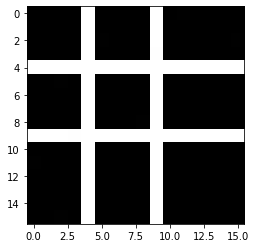

In [ ]:
#Imagem III: 16x16 binária

#Cálculo da transformada discreta de cosseno inversa
IT = idct(T)
print("Matriz resultante")
print(IT)

#Mostrar a imagem resultante do processo da transformada inversa 
print("\nImagem resultante:")
plt.imshow(IT, 'gray', origin = 'upper')
plt.show()

In [ ]:
#Imagem III: 16x16 binária

#Cálculo do MSE das imagens original e resultante
print("Mean Square Error:", mse(im, IT))

Mean Square Error: 0.078125


Imagem original:


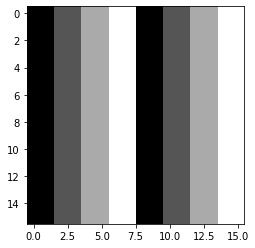


Matriz transformada:
[[ 2040.  -630.    -0. -1138.    -0.   425.    -0.  -398.    -0.   326.
      0.  -227.    -0.   345.    -0.    62.]
 [   -0.     0.     0.    -0.    -0.     0.    -0.     0.    -0.     0.
     -0.    -0.     0.    -0.    -0.     0.]
 [   -0.     0.     0.    -0.     0.     0.     0.     0.    -0.    -0.
      0.     0.     0.    -0.    -0.    -0.]
 [    0.    -0.    -0.    -0.     0.     0.    -0.    -0.    -0.     0.
      0.    -0.    -0.     0.     0.     0.]
 [   -0.     0.    -0.     0.     0.     0.    -0.     0.     0.    -0.
     -0.    -0.    -0.    -0.     0.     0.]
 [    0.    -0.    -0.    -0.    -0.     0.     0.    -0.     0.     0.
     -0.    -0.     0.     0.    -0.     0.]
 [   -0.     0.     0.     0.    -0.    -0.    -0.     0.    -0.    -0.
      0.     0.    -0.    -0.    -0.    -0.]
 [   -0.     0.    -0.     0.    -0.    -0.     0.     0.    -0.    -0.
     -0.     0.     0.    -0.    -0.    -0.]
 [   -0.     0.    -0.     0.     0.    -0

In [ ]:
#Imagem IV: 16x16 com 4 níveis de cinza

#Construção de uma matriz cinza, de tamanho 16x16
im = np.array([0, 0, 85, 85, 170, 170, 255, 255] * 2)
im = np.array([im] * 16)

#Mostrar a imagem construída
print("Imagem original:")
plt.imshow(im, 'gray', origin = 'upper')
plt.show()

#Cálculo da transformada discreta de cosseno
T = dct(im)
print("\nMatriz transformada:")
print(T)

Matriz resultante
[[ -0.   0.  85.  85. 170. 170. 255. 255.   0.  -0.  85.  85. 170. 170.
  255. 255.]
 [ -0.   0.  85.  85. 170. 170. 255. 255.   0.  -0.  85.  85. 170. 170.
  255. 255.]
 [ -0.   0.  85.  85. 170. 170. 255. 255.   0.  -0.  85.  85. 170. 170.
  255. 255.]
 [ -0.   0.  85.  85. 170. 170. 255. 255.   0.  -0.  85.  85. 170. 170.
  255. 255.]
 [ -0.   0.  85.  85. 170. 170. 255. 255.   0.  -0.  85.  85. 170. 170.
  255. 255.]
 [ -0.   0.  85.  85. 170. 170. 255. 255.   0.  -0.  85.  85. 170. 170.
  255. 255.]
 [ -0.   0.  85.  85. 170. 170. 255. 255.   0.  -0.  85.  85. 170. 170.
  255. 255.]
 [ -0.   0.  85.  85. 170. 170. 255. 255.   0.  -0.  85.  85. 170. 170.
  255. 255.]
 [ -0.   0.  85.  85. 170. 170. 255. 255.   0.  -0.  85.  85. 170. 170.
  255. 255.]
 [ -0.   0.  85.  85. 170. 170. 255. 255.   0.  -0.  85.  85. 170. 170.
  255. 255.]
 [ -0.   0.  85.  85. 170. 170. 255. 255.   0.  -0.  85.  85. 170. 170.
  255. 255.]
 [ -0.   0.  85.  85. 170. 170. 255. 255.   0. 

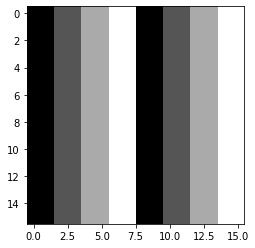

In [ ]:
#Imagem IV: 16x16 com 4 níveis de cinza

#Cálculo da transformada discreta de cosseno inversa
IT = idct(T)
print("Matriz resultante")
print(IT)

#Mostrar a imagem resultante do processo da transformada inversa 
print("\nImagem resultante:")
plt.imshow(IT, 'gray', origin = 'upper')
plt.show()

In [ ]:
#Imagem IV: 16x16 com 4 níveis de cinza

#Cálculo do MSE das imagens original e resultante
print("Mean Square Error:", mse(im, IT))

Mean Square Error: 0.0


Imagem original:


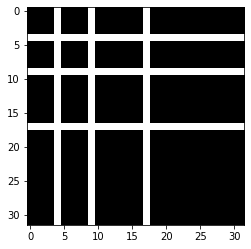


Matriz transformada:
[[ 1.458e+03  4.420e+02 -2.000e+02 ...  5.020e+02  3.500e+01 -4.460e+02]
 [ 4.420e+02 -2.900e+01  1.300e+01 ... -3.300e+01 -2.000e+00  2.900e+01]
 [-2.000e+02  1.300e+01 -6.000e+00 ...  1.500e+01  1.000e+00 -1.300e+01]
 ...
 [ 5.020e+02 -3.300e+01  1.500e+01 ... -3.800e+01 -3.000e+00  3.300e+01]
 [ 3.500e+01 -2.000e+00  1.000e+00 ... -3.000e+00 -0.000e+00  2.000e+00]
 [-4.460e+02  2.900e+01 -1.300e+01 ...  3.300e+01  2.000e+00 -3.000e+01]]


In [ ]:
#Imagem V: 32x32 binária

#Construção de uma matriz binária, de tamanho 32x32
im = np.zeros([32, 32])

#Formação do padrão da imagem
for i in range(32):

  for j in range(32):

    if j == 4 or i == 4 or j == 9 or i == 9 or i == 17 or j == 17:

      im[i, j] = 255
    
#Mostrar a imagem construída
print("Imagem original:")
plt.imshow(im, 'gray', origin = 'upper')
plt.show()

#Cálculo da transformada discreta de cosseno
T = dct(im)
print("\nMatriz transformada:")
print(T)

Matriz resultante
[[-1.  0. -0. ...  0.  0.  0.]
 [ 0. -0. -0. ... -0.  0.  0.]
 [-0. -0. -0. ...  0. -0. -0.]
 ...
 [ 0. -0.  0. ...  0. -0.  0.]
 [ 0.  0. -0. ... -0. -0.  0.]
 [ 0.  0. -0. ...  0.  0.  0.]]

Imagem resultante:


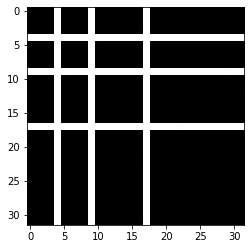

In [ ]:
#Imagem V: 32x32 binária

#Cálculo da transformada discreta de cosseno inversa
IT = idct(T)
print("Matriz resultante")
print(IT)

#Mostrar a imagem resultante do processo da transformada inversa 
print("\nImagem resultante:")
plt.imshow(IT, 'gray', origin = 'upper')
plt.show()

In [ ]:
#Imagem V: 32x32 binária

#Cálculo do MSE das imagens original e resultante
print("Mean Square Error:", mse(im, IT))

Mean Square Error: 0.07421875


Imagem original:


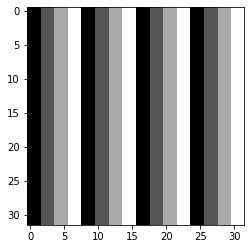


Matriz transformada:
[[4080. -608.   -0. ...  100.    0.   30.]
 [   0.    0.    0. ...   -0.    0.   -0.]
 [  -0.   -0.   -0. ...   -0.    0.    0.]
 ...
 [   0.   -0.   -0. ...    0.   -0.   -0.]
 [   0.   -0.   -0. ...    0.    0.    0.]
 [  -0.    0.    0. ...   -0.    0.   -0.]]


In [ ]:
#Imagem VI: 32x32 com 4 níveis de cinza

#Construção de uma matriz cinza, de tamanho 32x32
im = np.array([0, 0, 85, 85, 170, 170, 255, 255] * 4)
im = np.array([im] * 32)

#Mostrar a imagem construída
print("Imagem original:")
plt.imshow(im, 'gray', origin = 'upper')
plt.show()

#Cálculo da transformada discreta de cosseno
T = dct(im)
print("\nMatriz transformada:")
print(T)

Matriz resultante
[[ -0.  -0.  85. ... 170. 255. 255.]
 [ -0.  -0.  85. ... 170. 255. 255.]
 [ -0.  -0.  85. ... 170. 255. 255.]
 ...
 [ -0.  -0.  85. ... 170. 255. 255.]
 [ -0.  -0.  85. ... 170. 255. 255.]
 [ -0.  -0.  85. ... 170. 255. 255.]]

Imagem resultante:


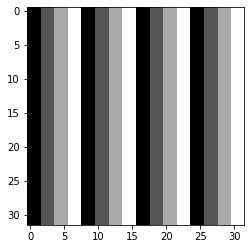

In [ ]:
#Imagem VI: 32x32 com 4 níveis de cinza

#Cálculo da transformada discreta de cosseno inversa
IT = idct(T)
print("Matriz resultante")
print(IT)

#Mostrar a imagem resultante do processo da transformada inversa 
print("\nImagem resultante:")
plt.imshow(IT, 'gray', origin = 'upper')
plt.show()

In [ ]:
#Imagem VI: 32x32 com 4 níveis de cinza

#Cálculo do MSE das imagens original e resultante
print("Mean Square Error:", mse(im, IT))

Mean Square Error: 0.0


Ao longo dos testes, foi possível notar alguns padrões. Para as imagens binárias (variações bruscas de tonalidade), com o aumento da janela de análise, o MSE diminuiu: obtivemos MSE = 0.10 para 8x8, MSE = 0.078 para 16x16 e MSE = 0.74 para 32x32. Porém, o tempo de processamento aumentou exponencialmente com o aumento das janelas, conferindo assim um tradeoff entre erro e tempo de processamento. Como observado, o MSE variou pouco entre os distintos tamanhos de janelas, mas o tempo de processamento variou muito. Logo, podemos concluir que a melhor opção de tamanho de janela é a menor, isto é, 8x8. Além disso, as matrizes resultantes nos mostraram que as variações de tons dos pixels entre a imagem original e a final é tão sutil que o olho humano provavelmente não é capaz de notar. Por exemplo, no processo da primeira imagem, notamos que as degradações, quando ocorrem, são de no máximo 1 tom (mudanças de 0 para 1 ou de 255 para 254). Essa mudança de apenas um tom não é notável para a nossa visão (pelo menos não para a minha). Dessa forma, as degradações, apesar de ocorrerem, não são suficientemente altas para serem notadas. Para as imagens em diferentes tons de cinza (variações de tom um pouco mais suaves), notamos que, visualmente, não houve nenhuma modificação. E de fato não houve: o MSE para essas imagens, independente do tamanho, foi de exatamente 0, mostrando que as degradações são mais intensas em imagens com variações bruscas de tons (como as binárias).